In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv("/content/gemstone.csv")
df


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [ ]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
# Encode categorical columns
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

In [ ]:
# Define X and y
X = df.drop(["price"], axis=1)
y = df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)

In [ ]:
print("\n🔹 Linear Regression")
print("MAE:", mae_lr)
print("R2 Score:", r2_lr)


🔹 Linear Regression
MAE: 706.8341996118613
R2 Score: 0.9250612022086958


In [ ]:
# 2. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, pred_dt)
r2_dt = r2_score(y_test, pred_dt)

In [ ]:

print("\n🔹 Decision Tree")
print("MAE:", mae_dt)
print("R2 Score:", r2_dt)


🔹 Decision Tree
MAE: 425.06906883636833
R2 Score: 0.95665874924559


In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [ ]:
print("\n🔹 Random Forest")
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)


🔹 Random Forest
MAE: 305.2538782125791
R2 Score: 0.9775975839484312


In [22]:
import pandas as pd

results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [mae_lr, mae_dt, mae_rf],
    "R2 Score": [r2_lr, r2_dt, r2_rf]
}

results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Table:\n")
print(results_df)




📊 Model Comparison Table:

               Model         MAE  R2 Score
0  Linear Regression  706.834200  0.925061
1      Decision Tree  425.069069  0.956659
2      Random Forest  305.253878  0.977598


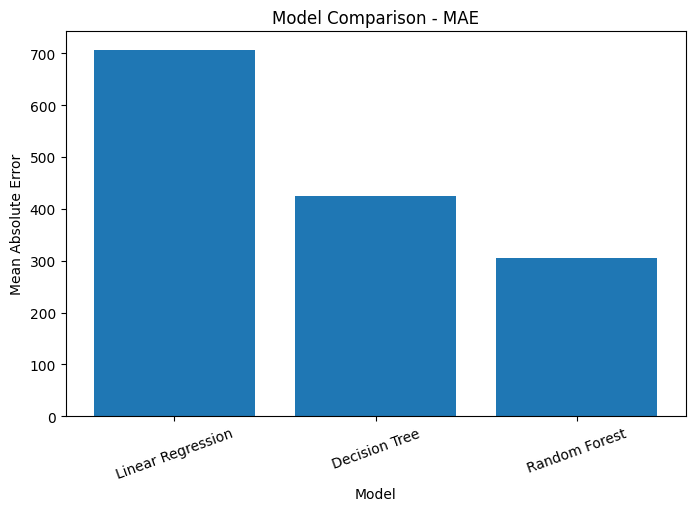

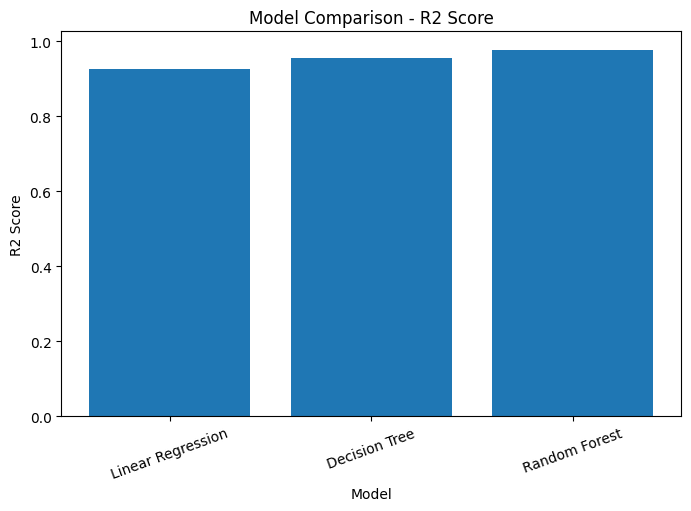

In [23]:
import matplotlib.pyplot as plt

# MAE Bar Chart
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["MAE"])
plt.title("Model Comparison - MAE")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=20)
plt.show()

# R2 Bar Chart
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.title("Model Comparison - R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=20)
plt.show()
